DMF

Aproximate error rate at iteration 0 is 69.0 %
Aproximate error rate at iteration 100 is 26.0 %
Aproximate error rate at iteration 200 is 21.0 %
Aproximate error rate at iteration 300 is 13.0 %
Aproximate error rate at iteration 400 is 14.000000000000002 %
Aproximate error rate at iteration 500 is 8.0 %
Aproximate error rate at iteration 600 is 7.000000000000001 %
Aproximate error rate at iteration 700 is 1.0 %
Aproximate error rate at iteration 800 is 4.0 %
Aproximate error rate at iteration 900 is 3.0 %
Total training time: 923.63 seconds
Aproximate Final training error is 3.5999999999999996 %
Test error is 11.049107142857142 %


In [184]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [185]:
eval_data_dmf = np.load("tmp/DMF/eval_data_dmf.npy")
Activations1 = np.load("tmp/DMF/ActivationsDMF_Layer1.npy")
Activations2 = np.load("tmp/DMF/ActivationsDMF_Layer2.npy")
Activations3 = np.load("tmp/DMF/ActivationsDMF_Layer3.npy")

best1 = np.load("tmp/DMF/BestImagesDMF_Layer1.npy")
best2 = np.load("tmp/DMF/BestImagesDMF_Layer2.npy")
best3 = np.load("tmp/DMF/BestImagesDMF_Layer3.npy")

filters1 = np.load("tmp/DMF/RandomFiltersIndex_Layer1.npy")
filters2 = np.load("tmp/DMF/RandomFiltersIndex_Layer2.npy")
filters3 = np.load("tmp/DMF/RandomFiltersIndex_Layer3.npy")

weight1 = np.load("tmp/DMF/WeightDMF_1.npy")
weight2 = np.load("tmp/DMF/WeightDMF_2.npy")
weight3 = np.load("tmp/DMF/WeightDMF_3.npy")

filters_projection_layer1 = np.load("tmp/DMF/FilterProjectionDMF_Layer1.npy")
filters_projection_layer2 = np.load("tmp/DMF/FilterProjectionDMF_Layer2.npy")
filters_projection_layer3 = np.load("tmp/DMF/FilterProjectionDMF_Layer3.npy")


print("Data:", eval_data_dmf.shape)
print("\n")
print("First layer activations", Activations1.shape)
print("Filter indexes:", filters1)
print("Weight 1 shape:", weight1.shape)
#print(best1)
print("\n")
print("Second layer activations",Activations2.shape)
#print(best2)
print("Filter indexes:", filters2)
print("Weight 2 shape:", weight2.shape)
print("\n")
print("Third layer activations",Activations3.shape)
#print(best3) 
print("Filter indexes:", filters3)
print("Weight 3 shape:", weight3.shape)

Data: (100, 128, 128, 3)


First layer activations (9, 10, 128, 128, 3)
Filter indexes: [19 22 30 20  0 17  3  9 16]
Weight 1 shape: (3, 3, 3, 32)


Second layer activations (9, 10, 128, 128, 3)
Filter indexes: [20 24 17 31 18 29  9 16 13]
Weight 2 shape: (3, 3, 32, 32)


Third layer activations (9, 10, 128, 128, 3)
Filter indexes: [26 19 20 18  9 14 27  4 16]
Weight 3 shape: (3, 3, 32, 64)


In [186]:
#Inspect

inspect = np.linalg.norm(Activations1, axis = (0,1))
inspect = np.linalg.norm(inspect, axis = (0,1))
print(inspect.shape)
print(np.round(inspect,2))

(3,)
[ 15.11  87.05  85.39]


In [187]:
print(np.max(eval_data_dmf[0,]*255))

255.0


In [188]:
Norm1 = np.linalg.norm(Activations1, axis = (3,4))
Norm1 = np.linalg.norm(Norm1, axis = (1,2))
print(Norm1.shape)

(9,)


In [189]:
print("Activations by Node:")
print(Norm1)

Activations by Node:
[  0.65100983  47.0125877    2.68444663   5.27155884  90.95219093
  65.98941663   0.88859026   9.4603125   11.62115907]


In [190]:
print(np.argsort(Norm1))

[0 6 2 3 7 8 1 5 4]


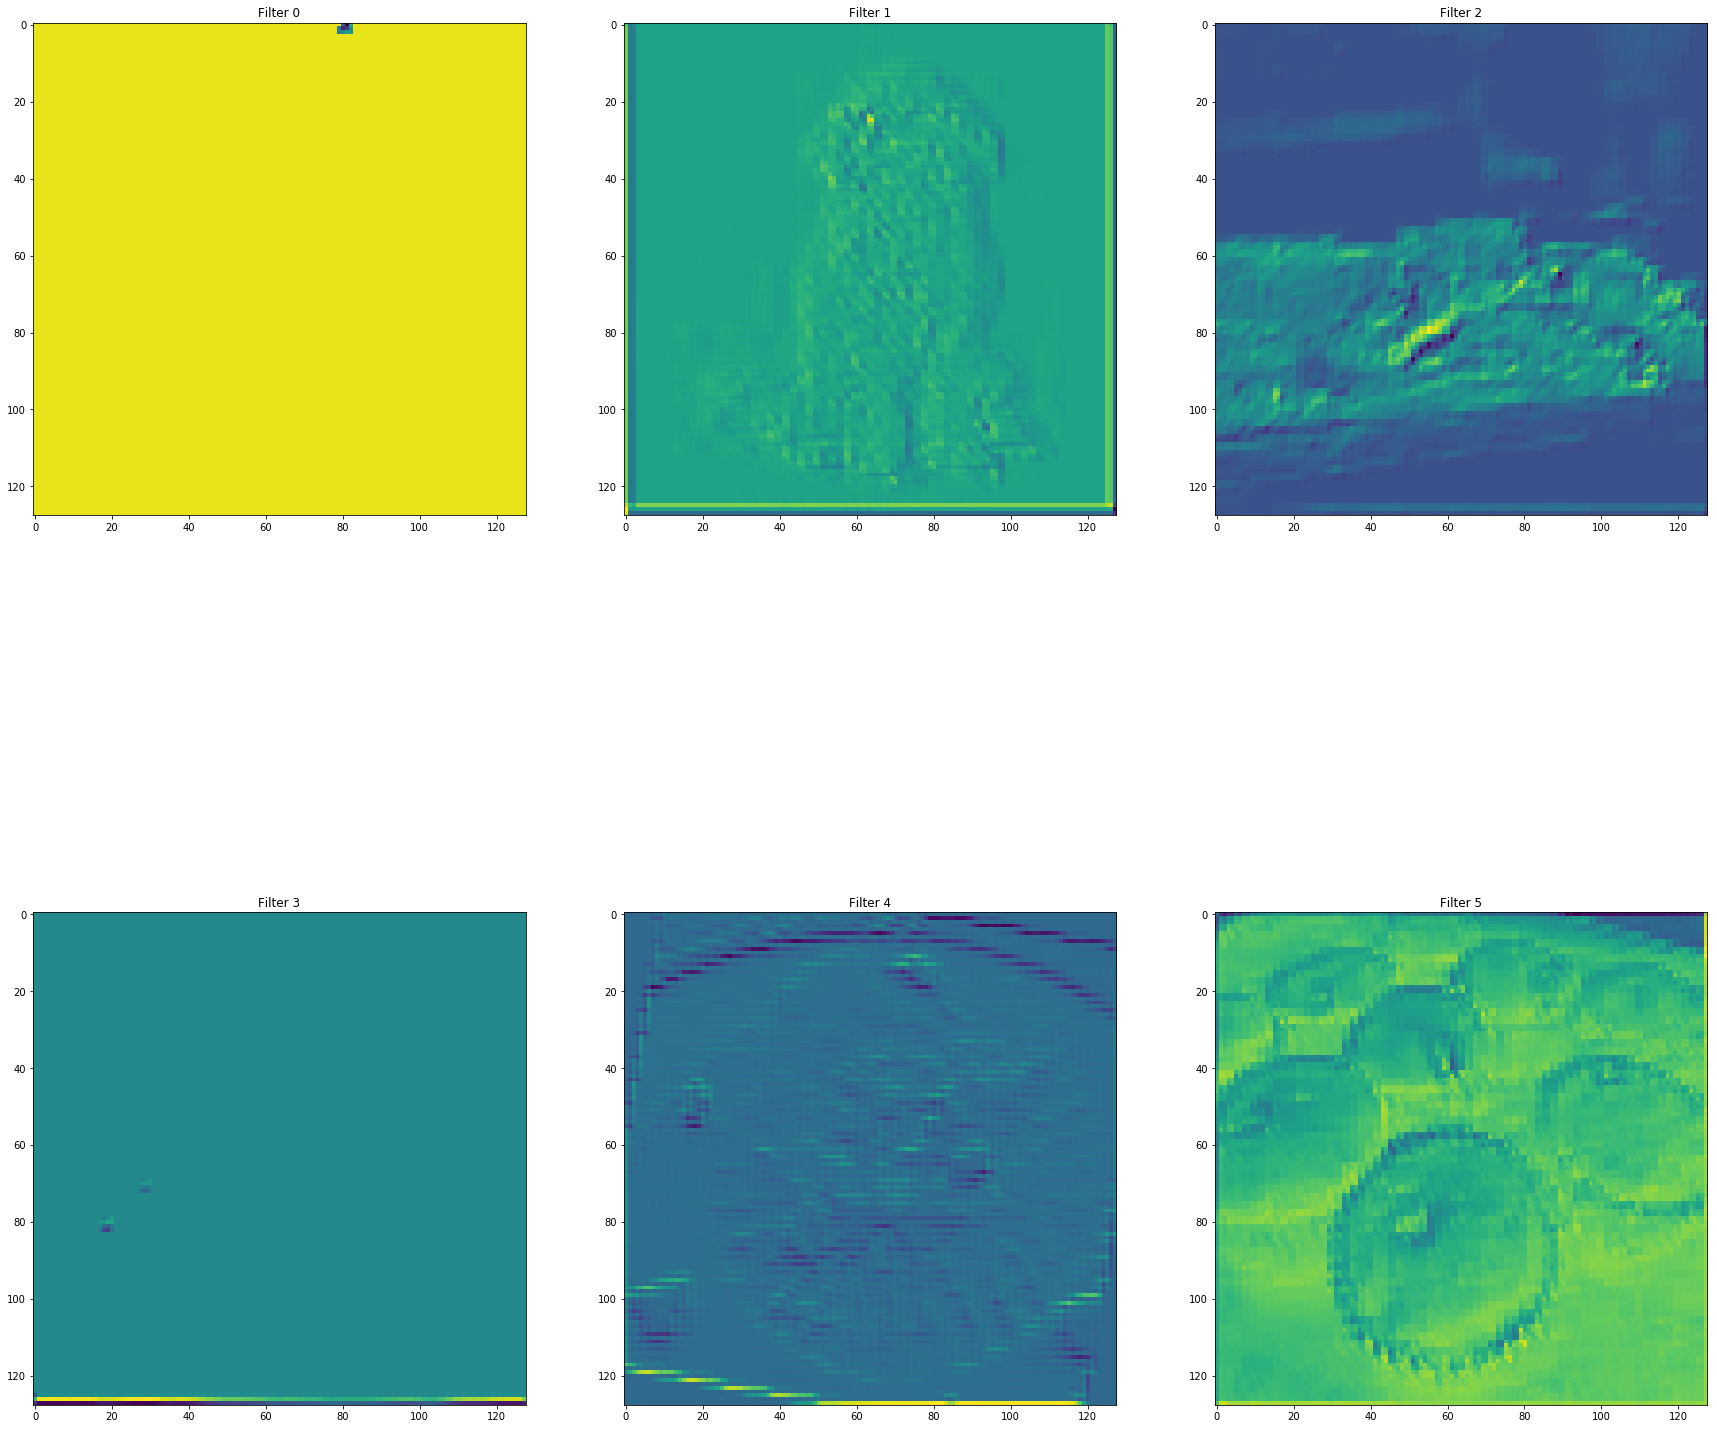

In [191]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(6):
    plt.subplot(2, 3, j)
    plt.title('Filter ' + str(i))
    plt.imshow(Activations1[i, 0, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

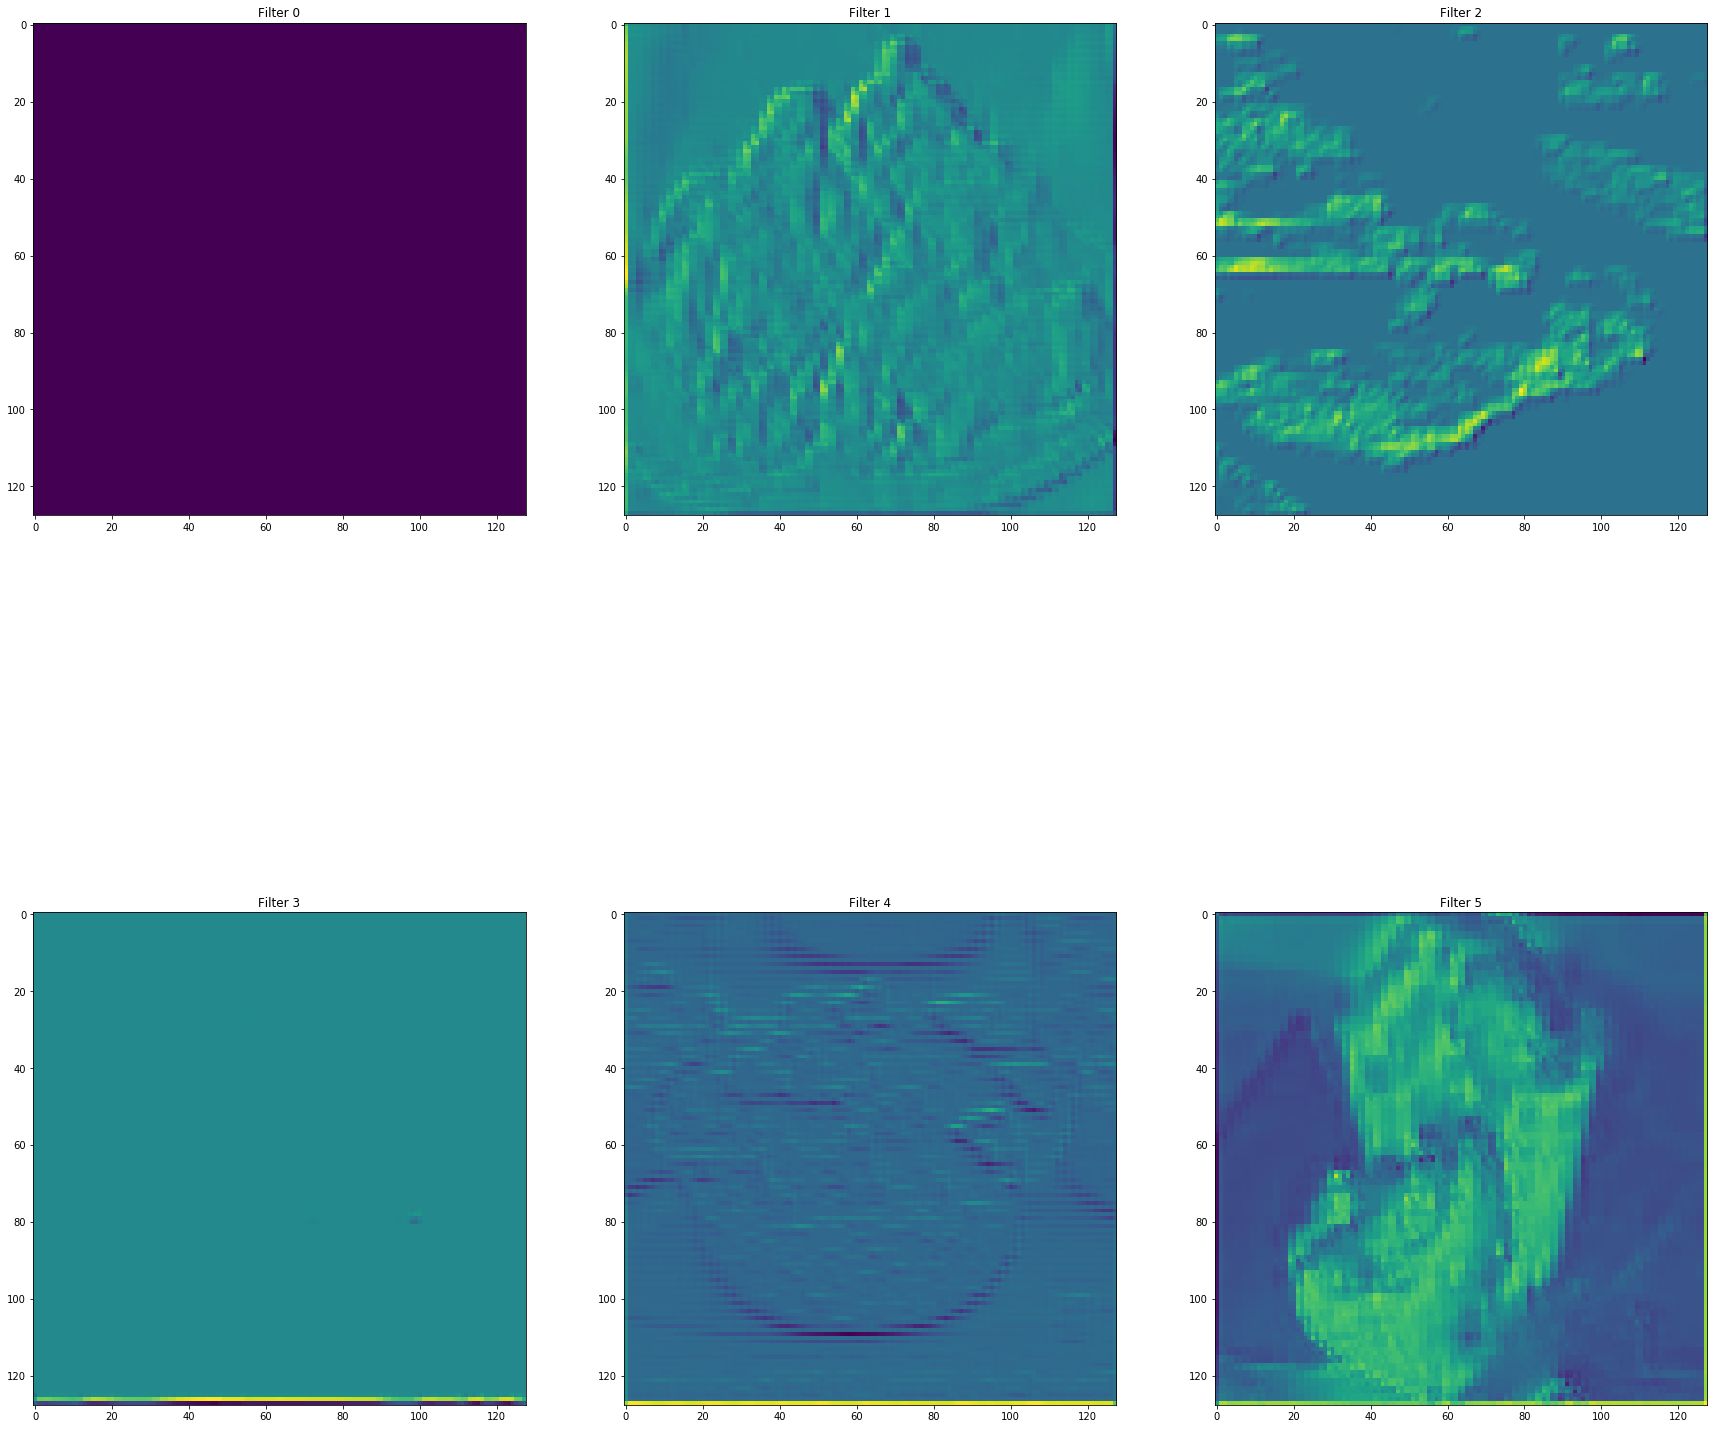

In [192]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(6):
    plt.subplot(2, 3, j)
    plt.title('Filter ' + str(i))
    plt.imshow(Activations1[i, 3, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

# Image action by random node:

In [193]:
subset = random.sample(range(Activations1.shape[0]), 2)
print("Selected nodes:", subset)

Selected nodes: [5, 4]


[ 19.  26.  29.  45.  46.  61.  64.  70.  82.  98.]


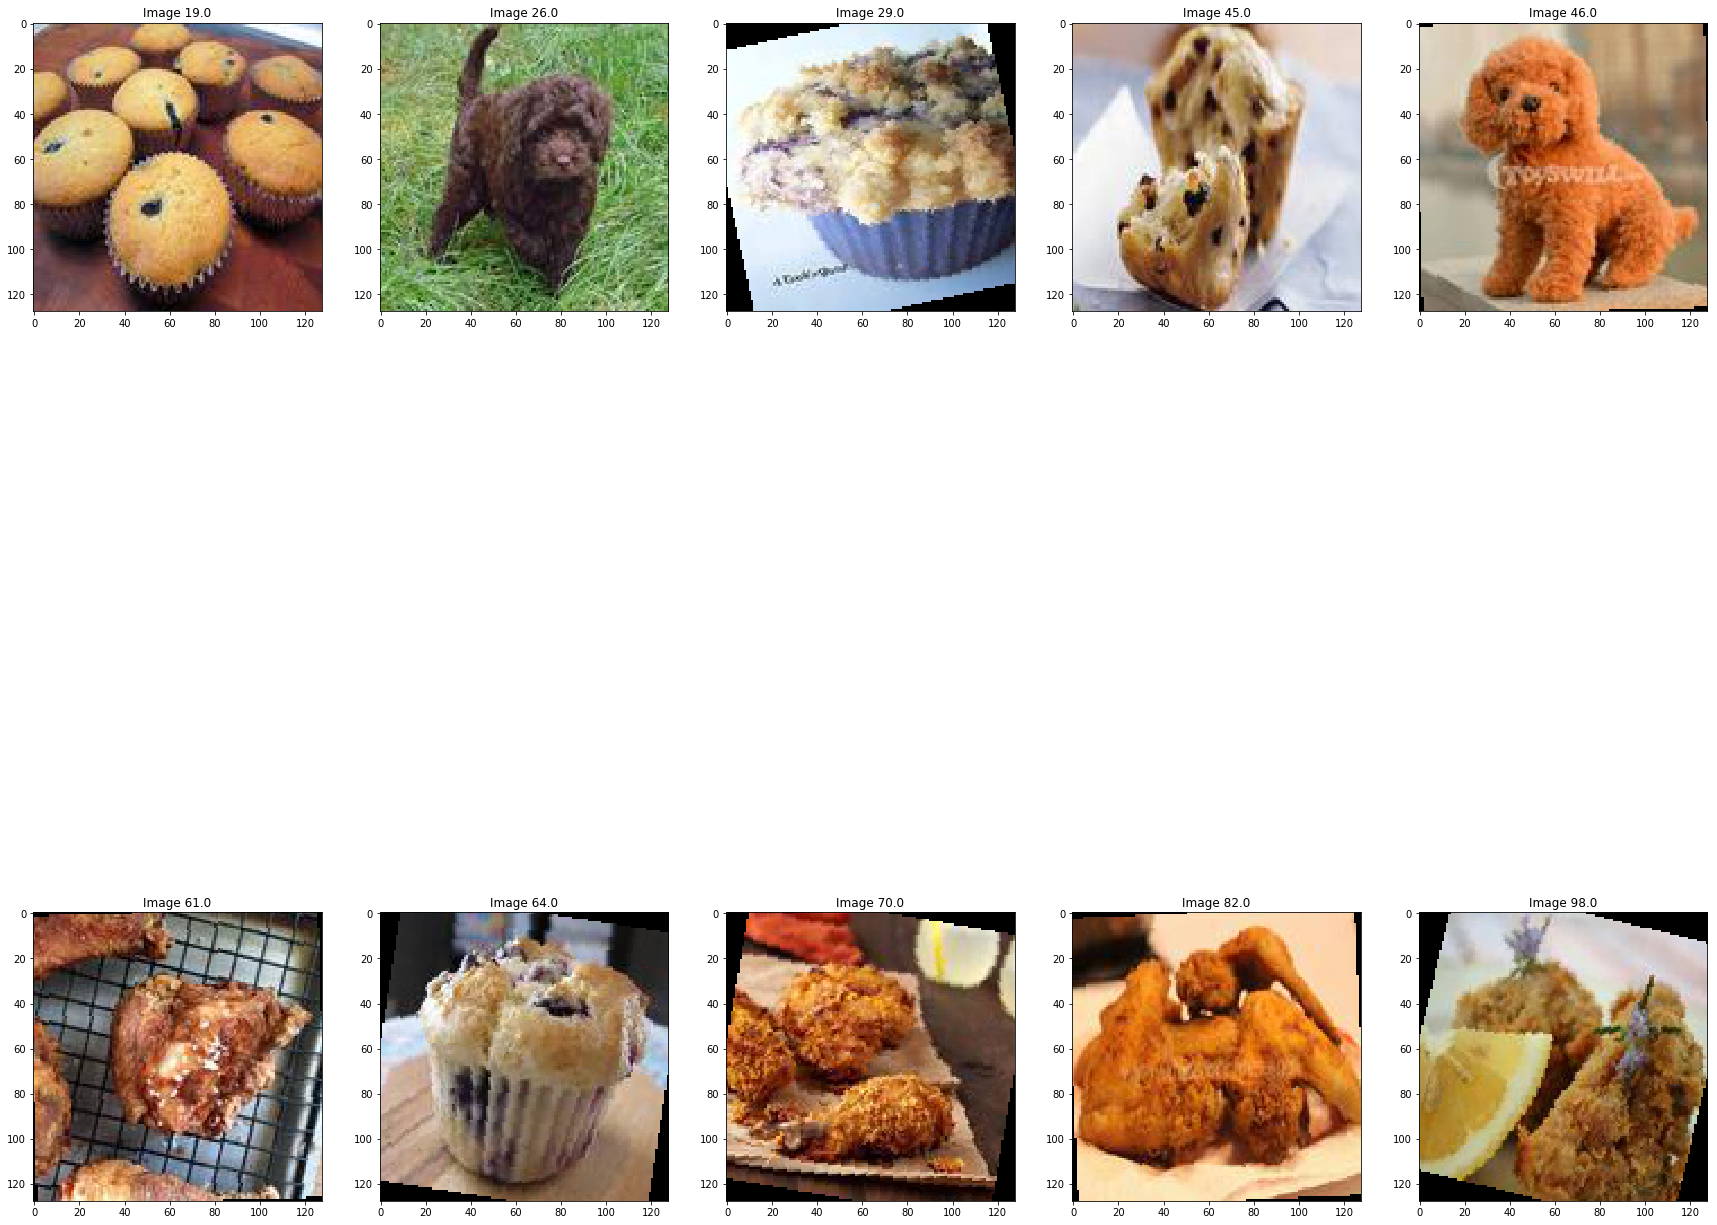

In [194]:
plt.figure(1, figsize=(30, 30))
j = 1
best_a = best1[subset[0],]

print(best_a)

for i in best_a:
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(eval_data_dmf[int(i), :, :, :], interpolation="nearest")
    j = j + 1

plt.show()

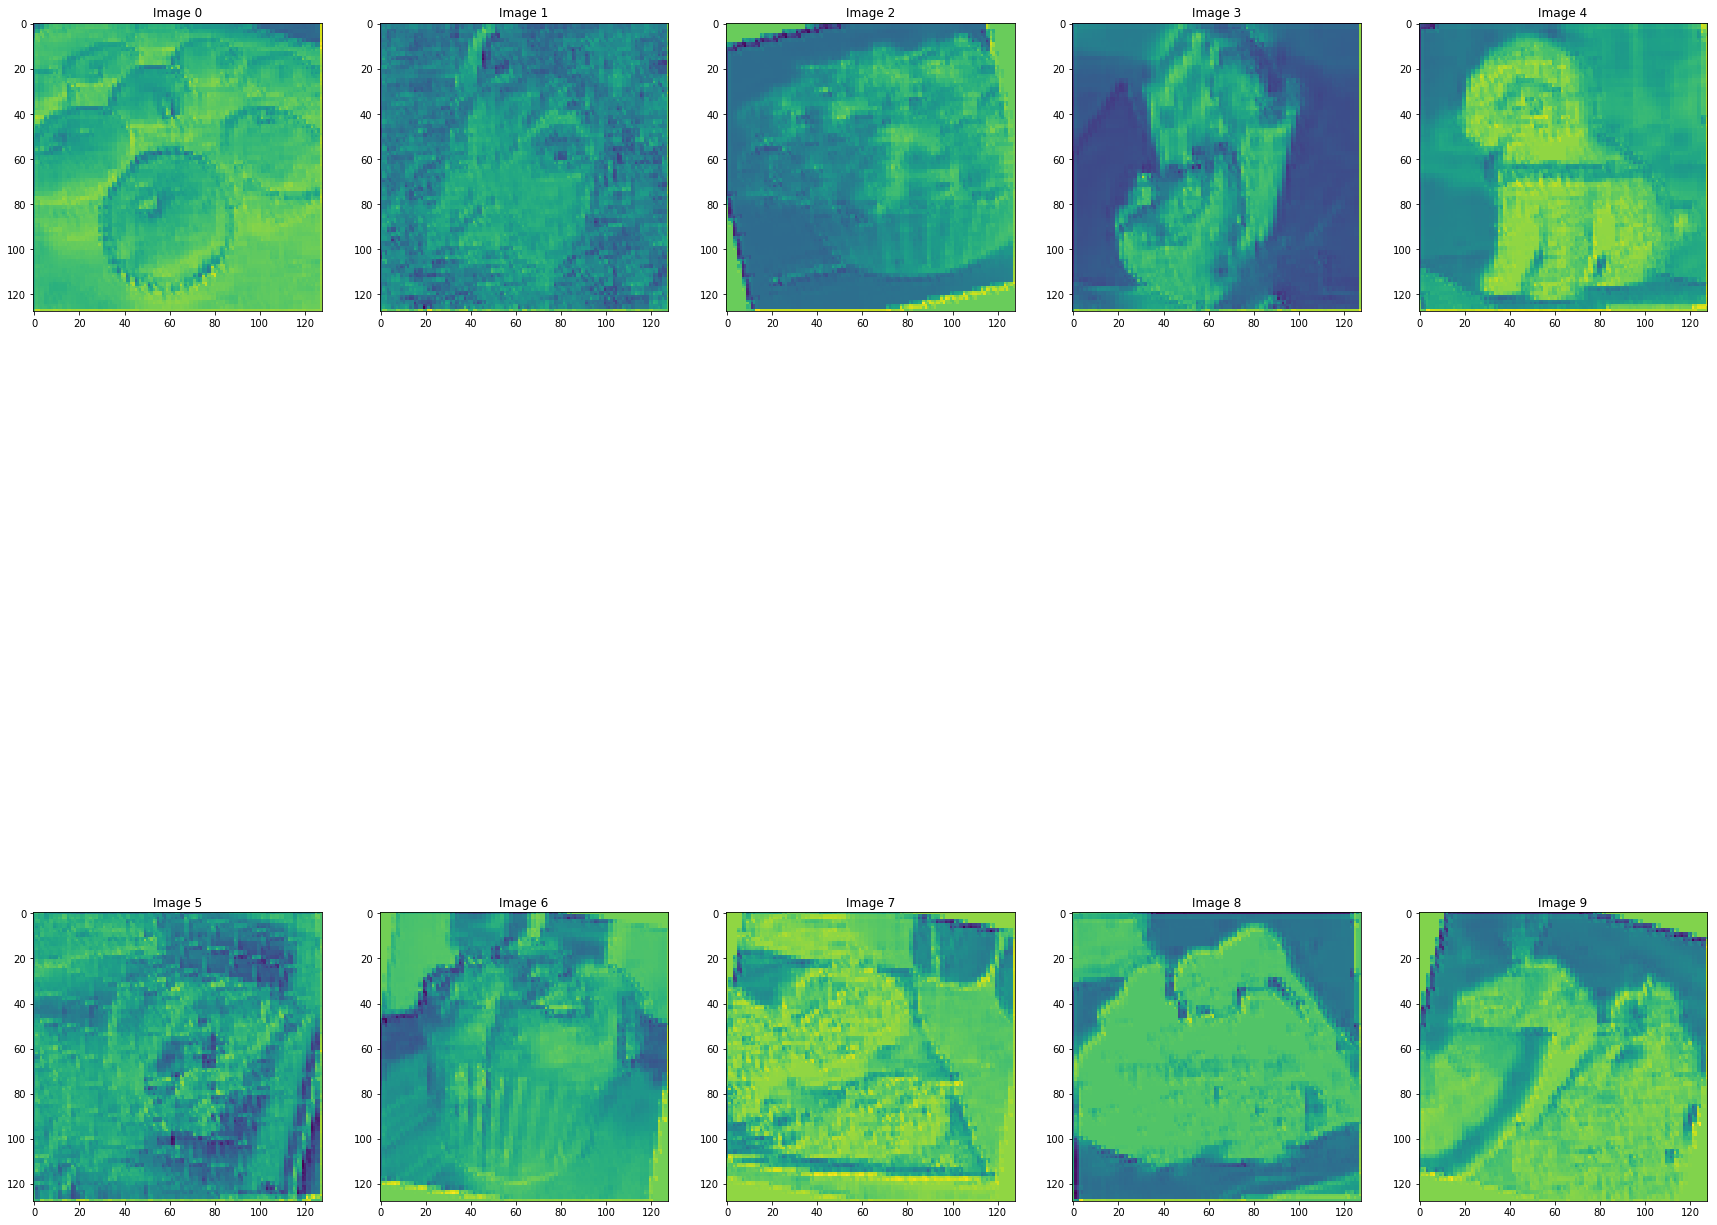

In [195]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(10):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(Activations1[subset[0], i, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

[ 12.  23.  35.  42.  52.  60.  62.  68.  86.  99.]


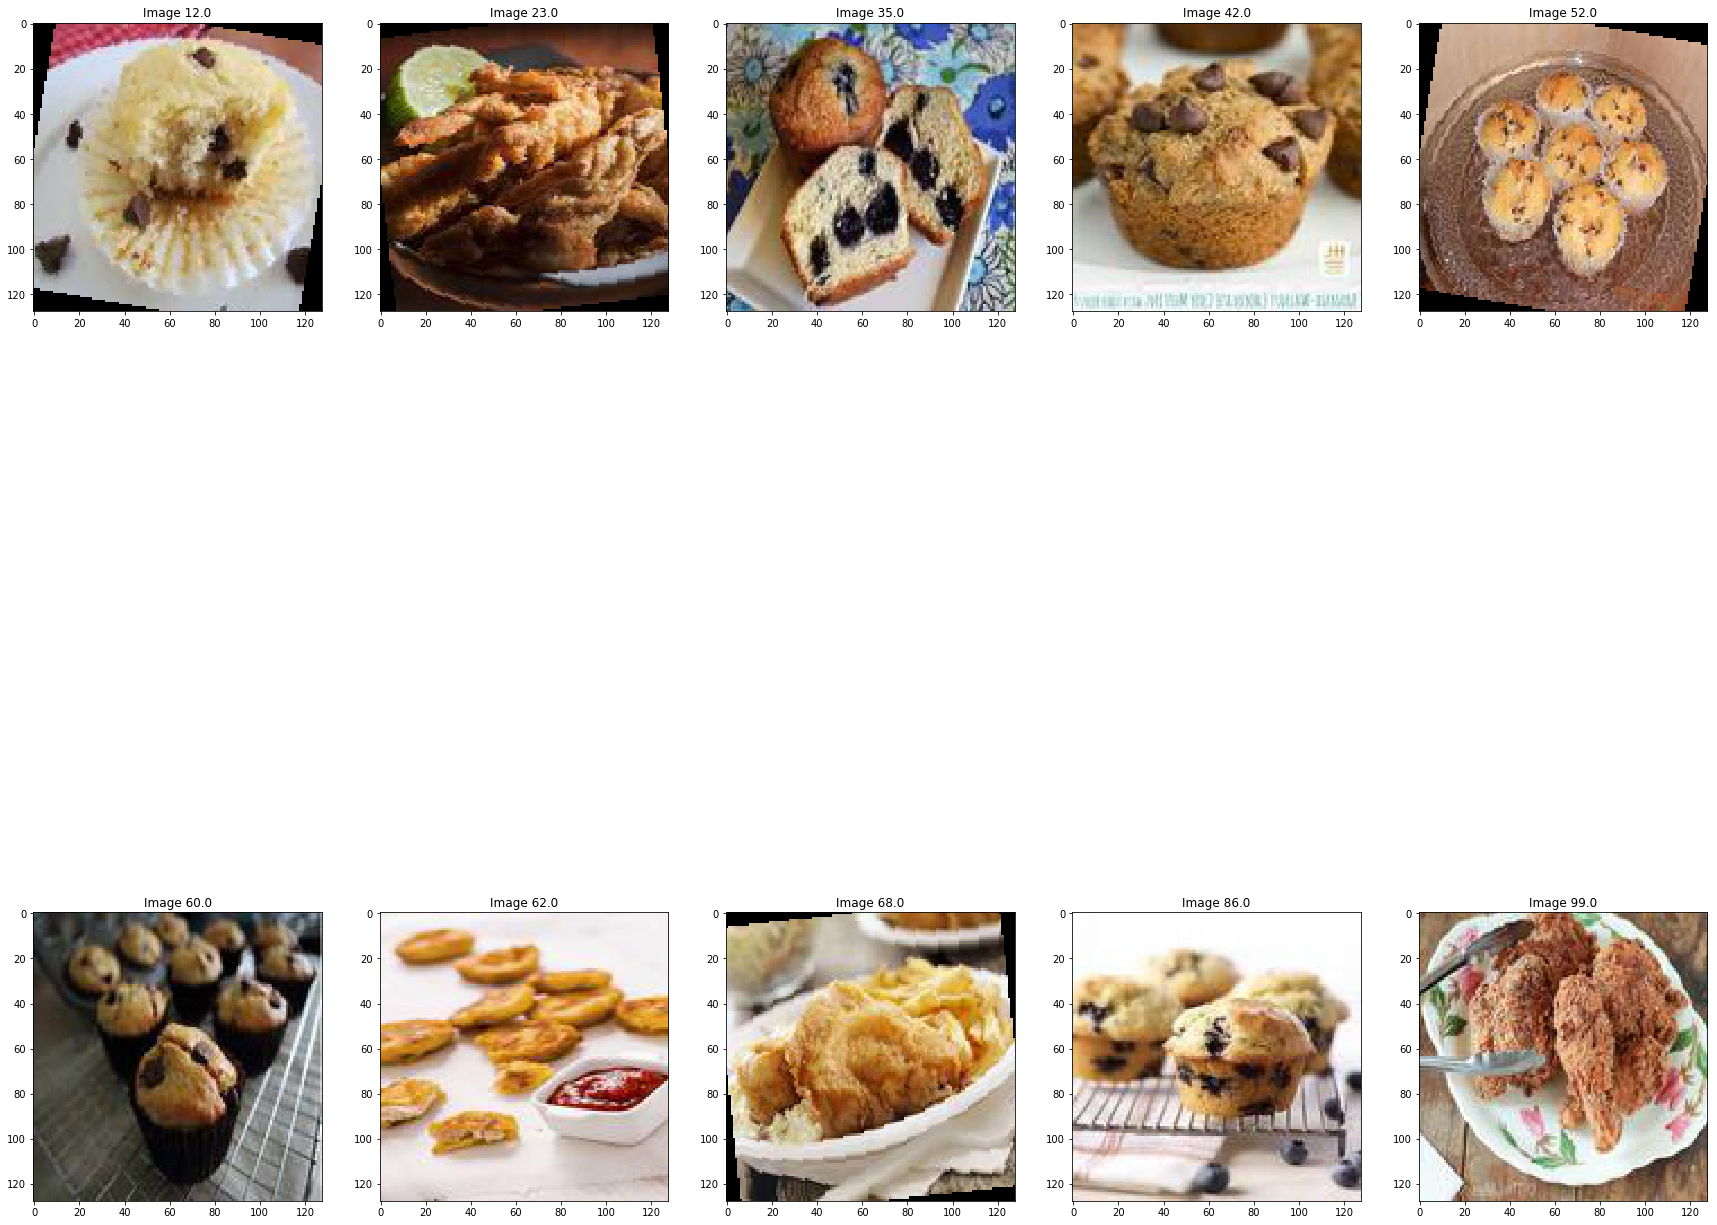

In [196]:
plt.figure(1, figsize=(30, 30))
j = 1
best_a = best1[subset[1],]

print(best_a)

for i in best_a:
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(eval_data_dmf[int(i), :, :, :], interpolation="nearest")
    j = j + 1

plt.show()

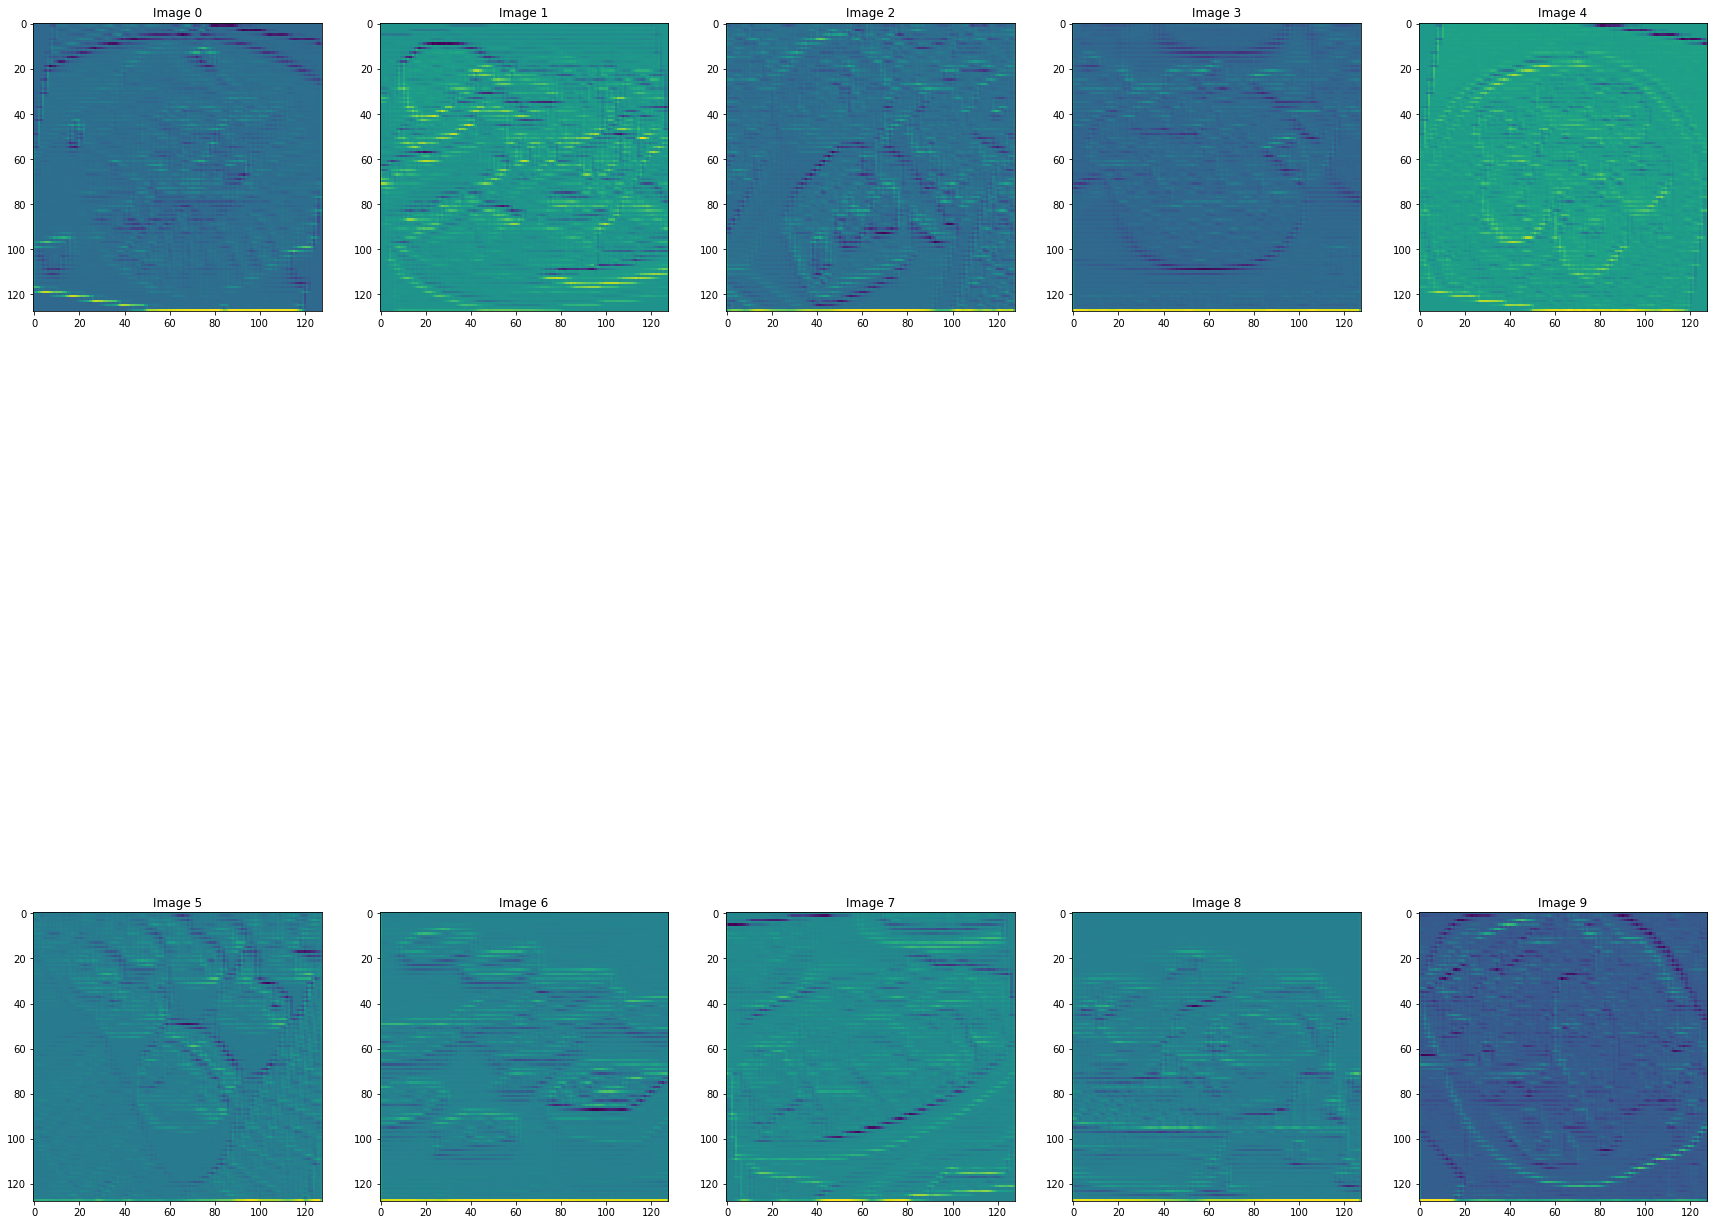

In [197]:
plt.figure(1, figsize=(30, 30))
j = 1

for i in range(10):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(Activations1[subset[1], i, :, :, 0], interpolation="nearest")
    j = j + 1
    
plt.show()

# Filter Projections

(3, 128, 128, 32)


D:\Anaconda64\envs\AdvML\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


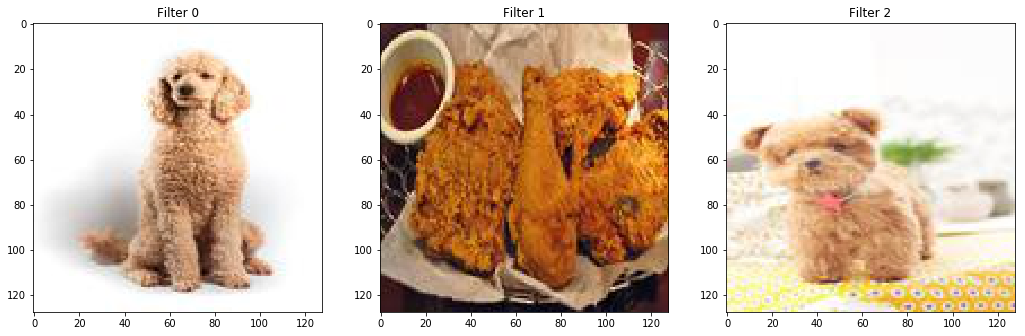

In [200]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(3):
    plt.subplot(2, 5, j)
    plt.title('Filter ' + str(i))
    plt.imshow(eval_data_dmf[i, :].reshape(128,128,3), interpolation="nearest")
    j = j + 1
    
plt.show()

In [210]:
eval_data_dmf.shape

(100, 128, 128, 3)

(3, 128, 128, 32)


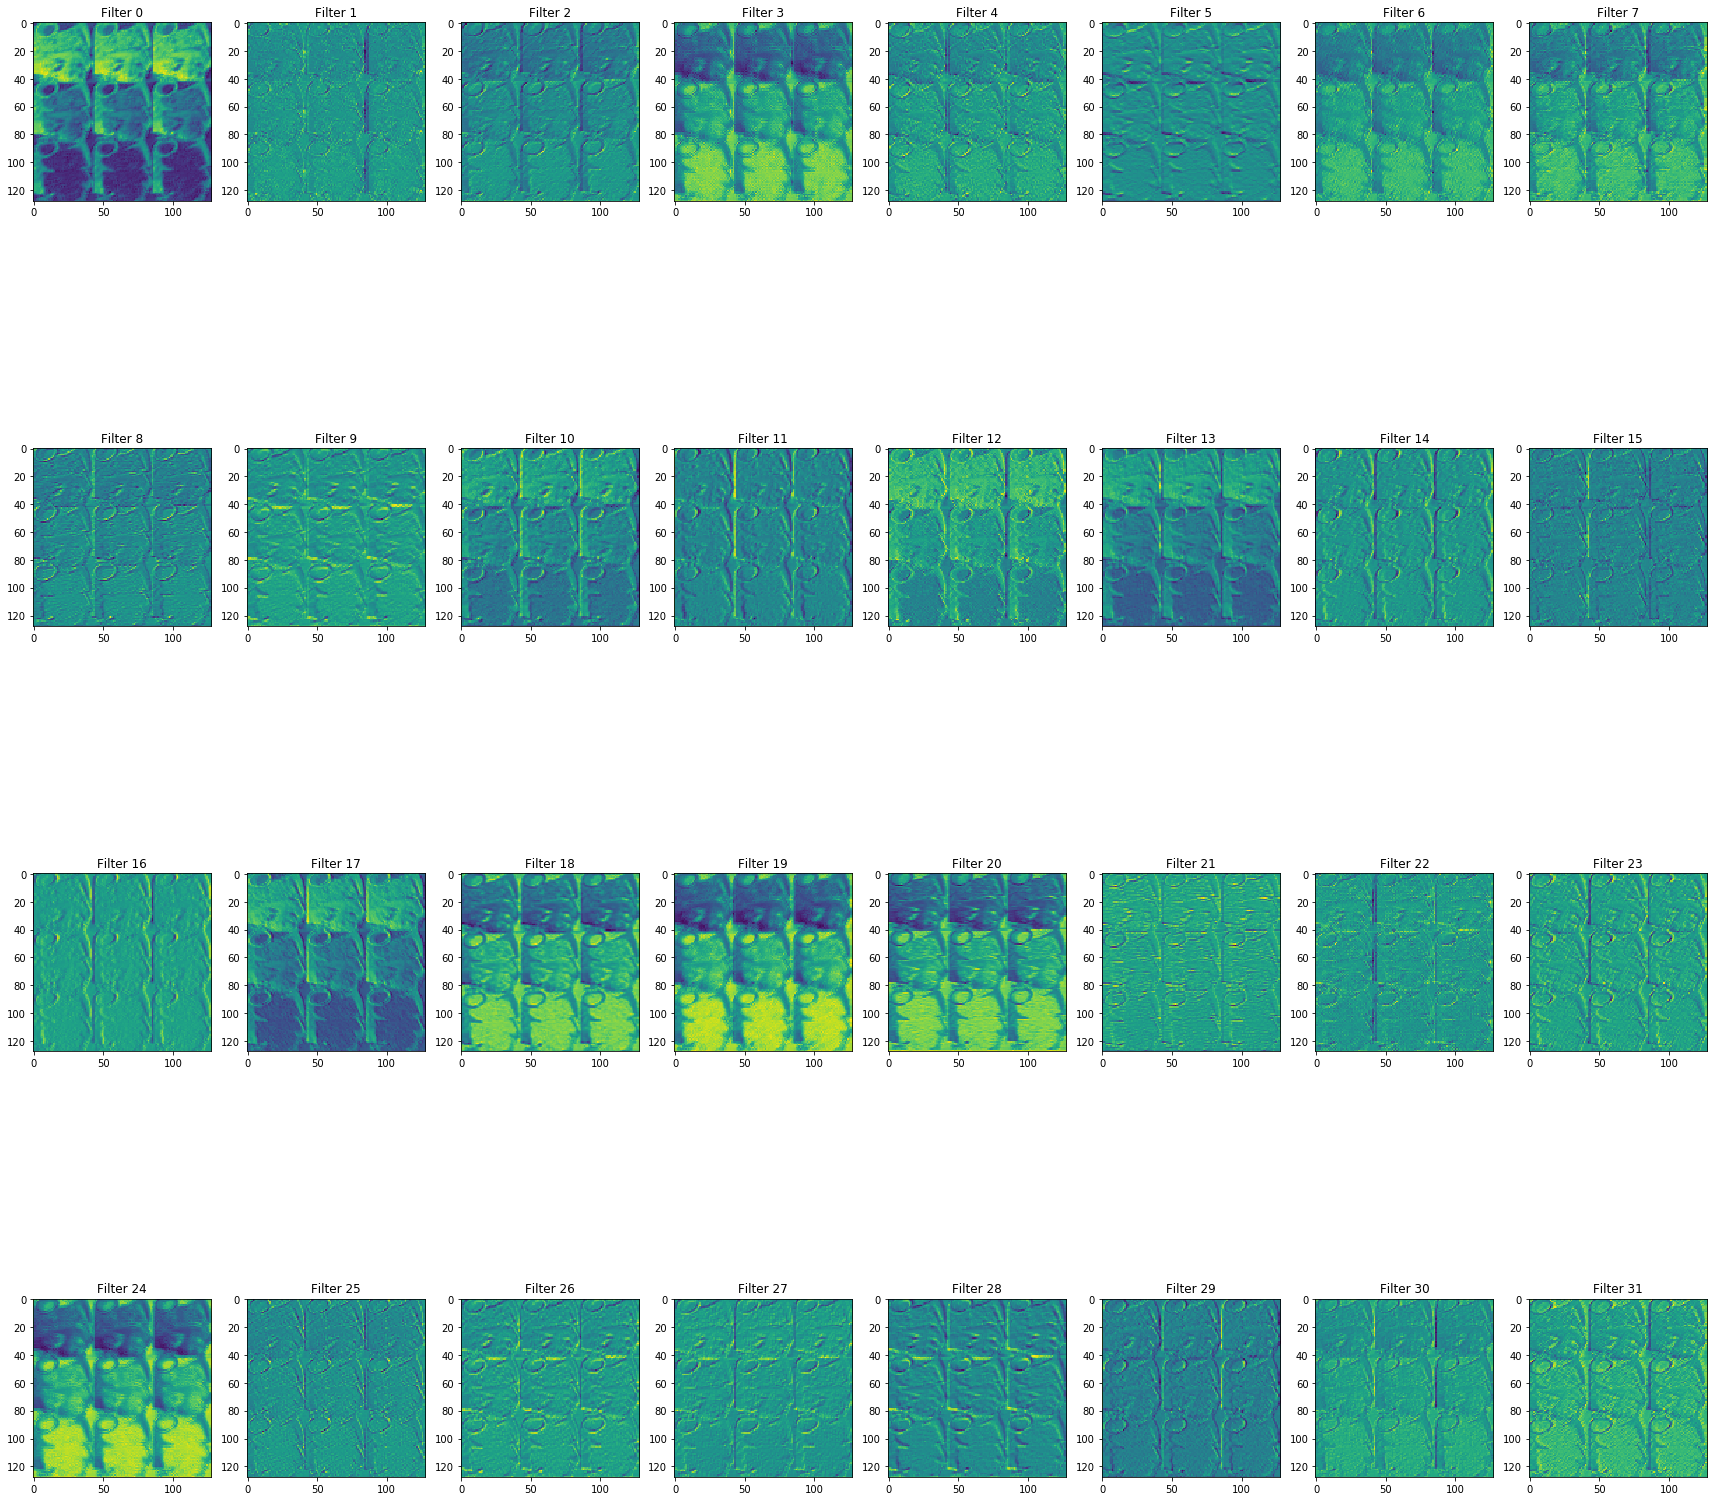

In [206]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(32):
    plt.subplot(4, 8, j)
    plt.title('Filter ' + str(i))
    plt.imshow(filters_projection_layer1[1, :, :, i], interpolation="nearest")
    j = j + 1
    
plt.show()

(3, 128, 128, 32)


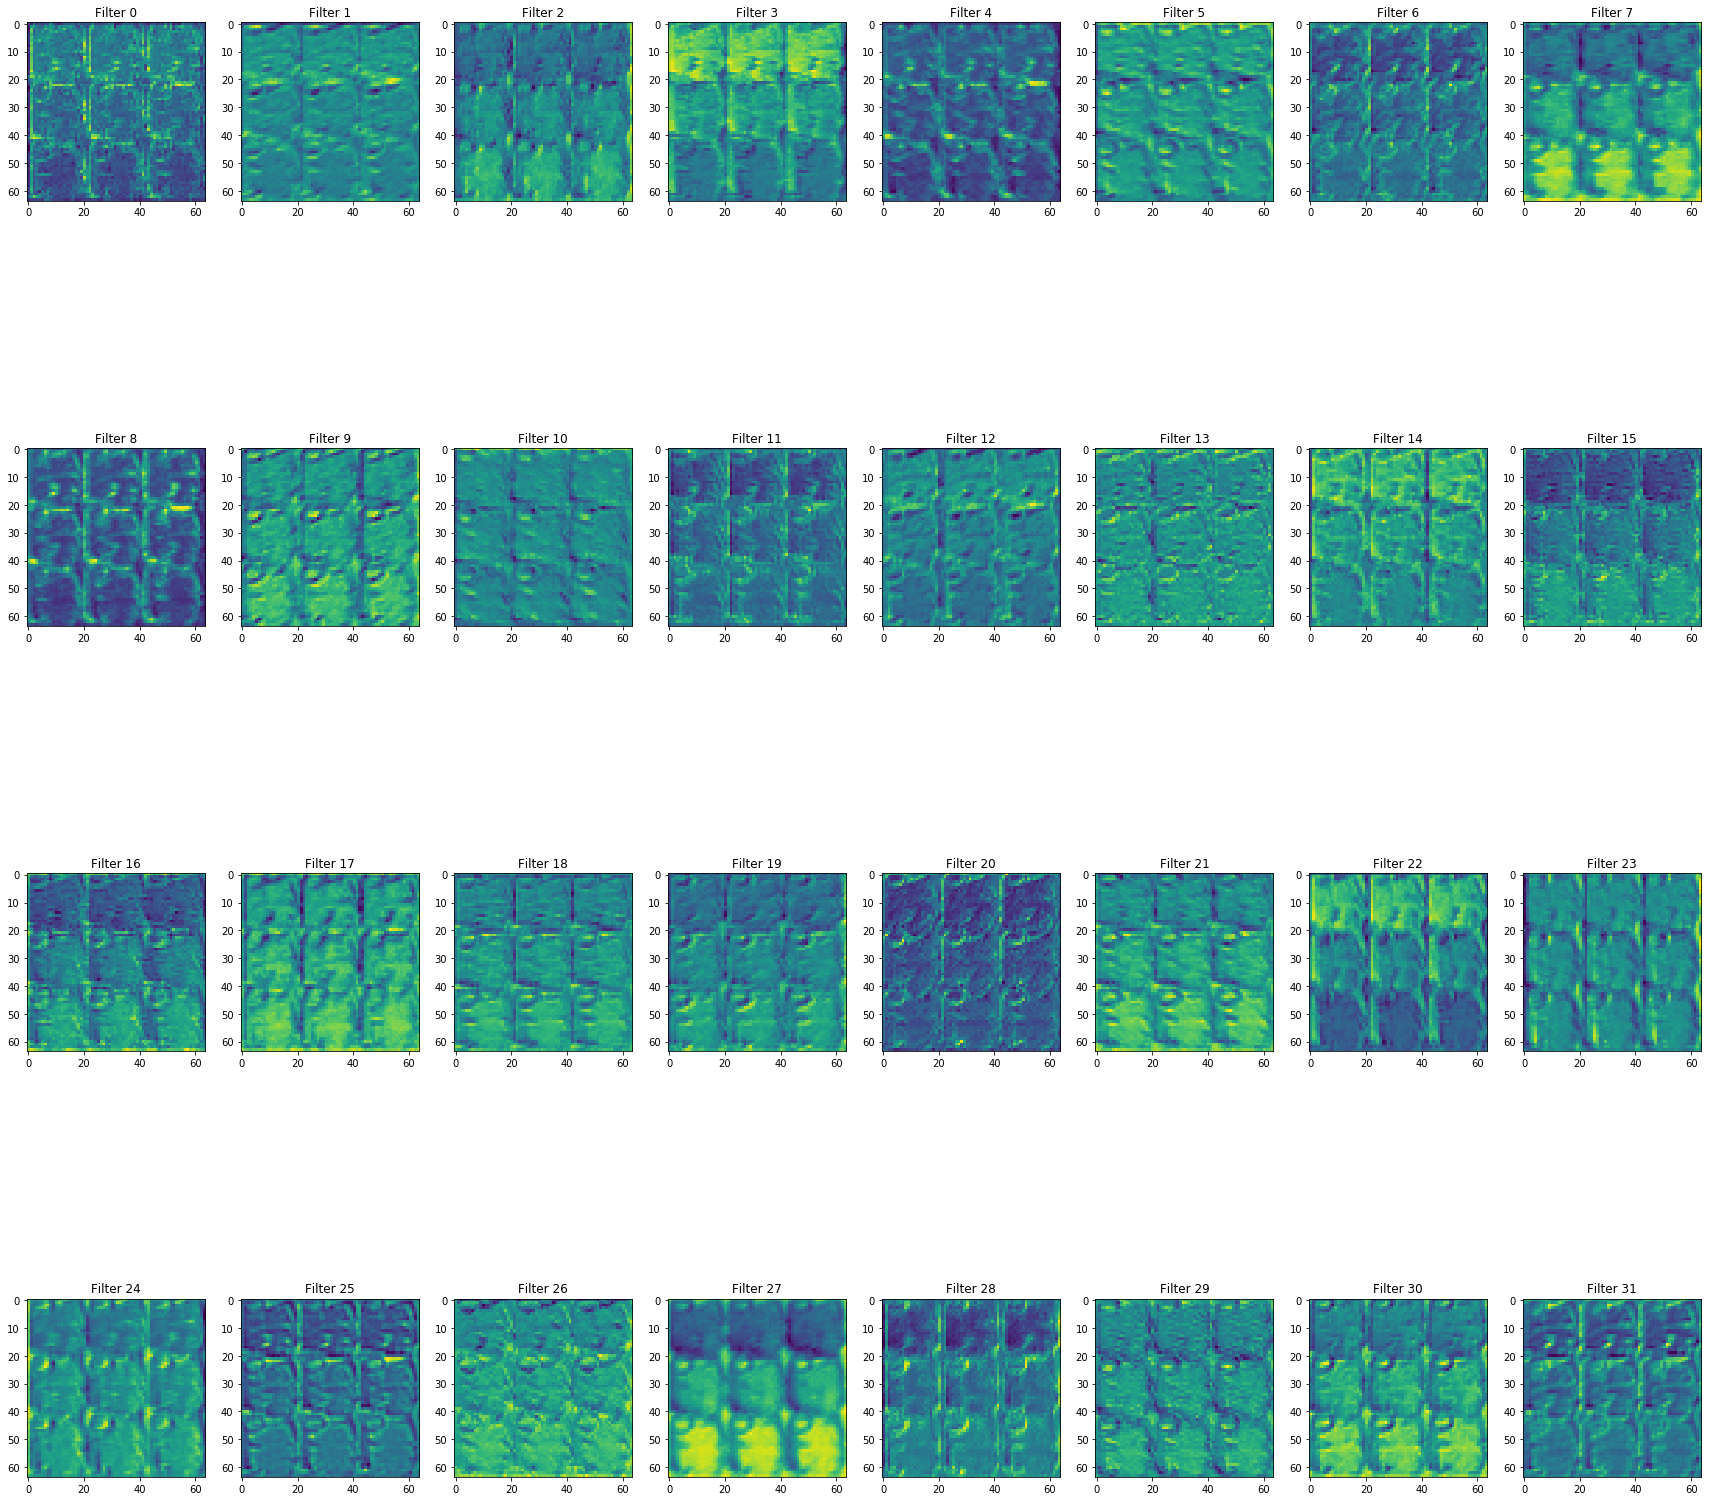

In [207]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(32):
    plt.subplot(4, 8, j)
    plt.title('Filter ' + str(i))
    plt.imshow(filters_projection_layer2[1, :, :, i], interpolation="nearest")
    j = j + 1
    
plt.show()

(3, 128, 128, 32)


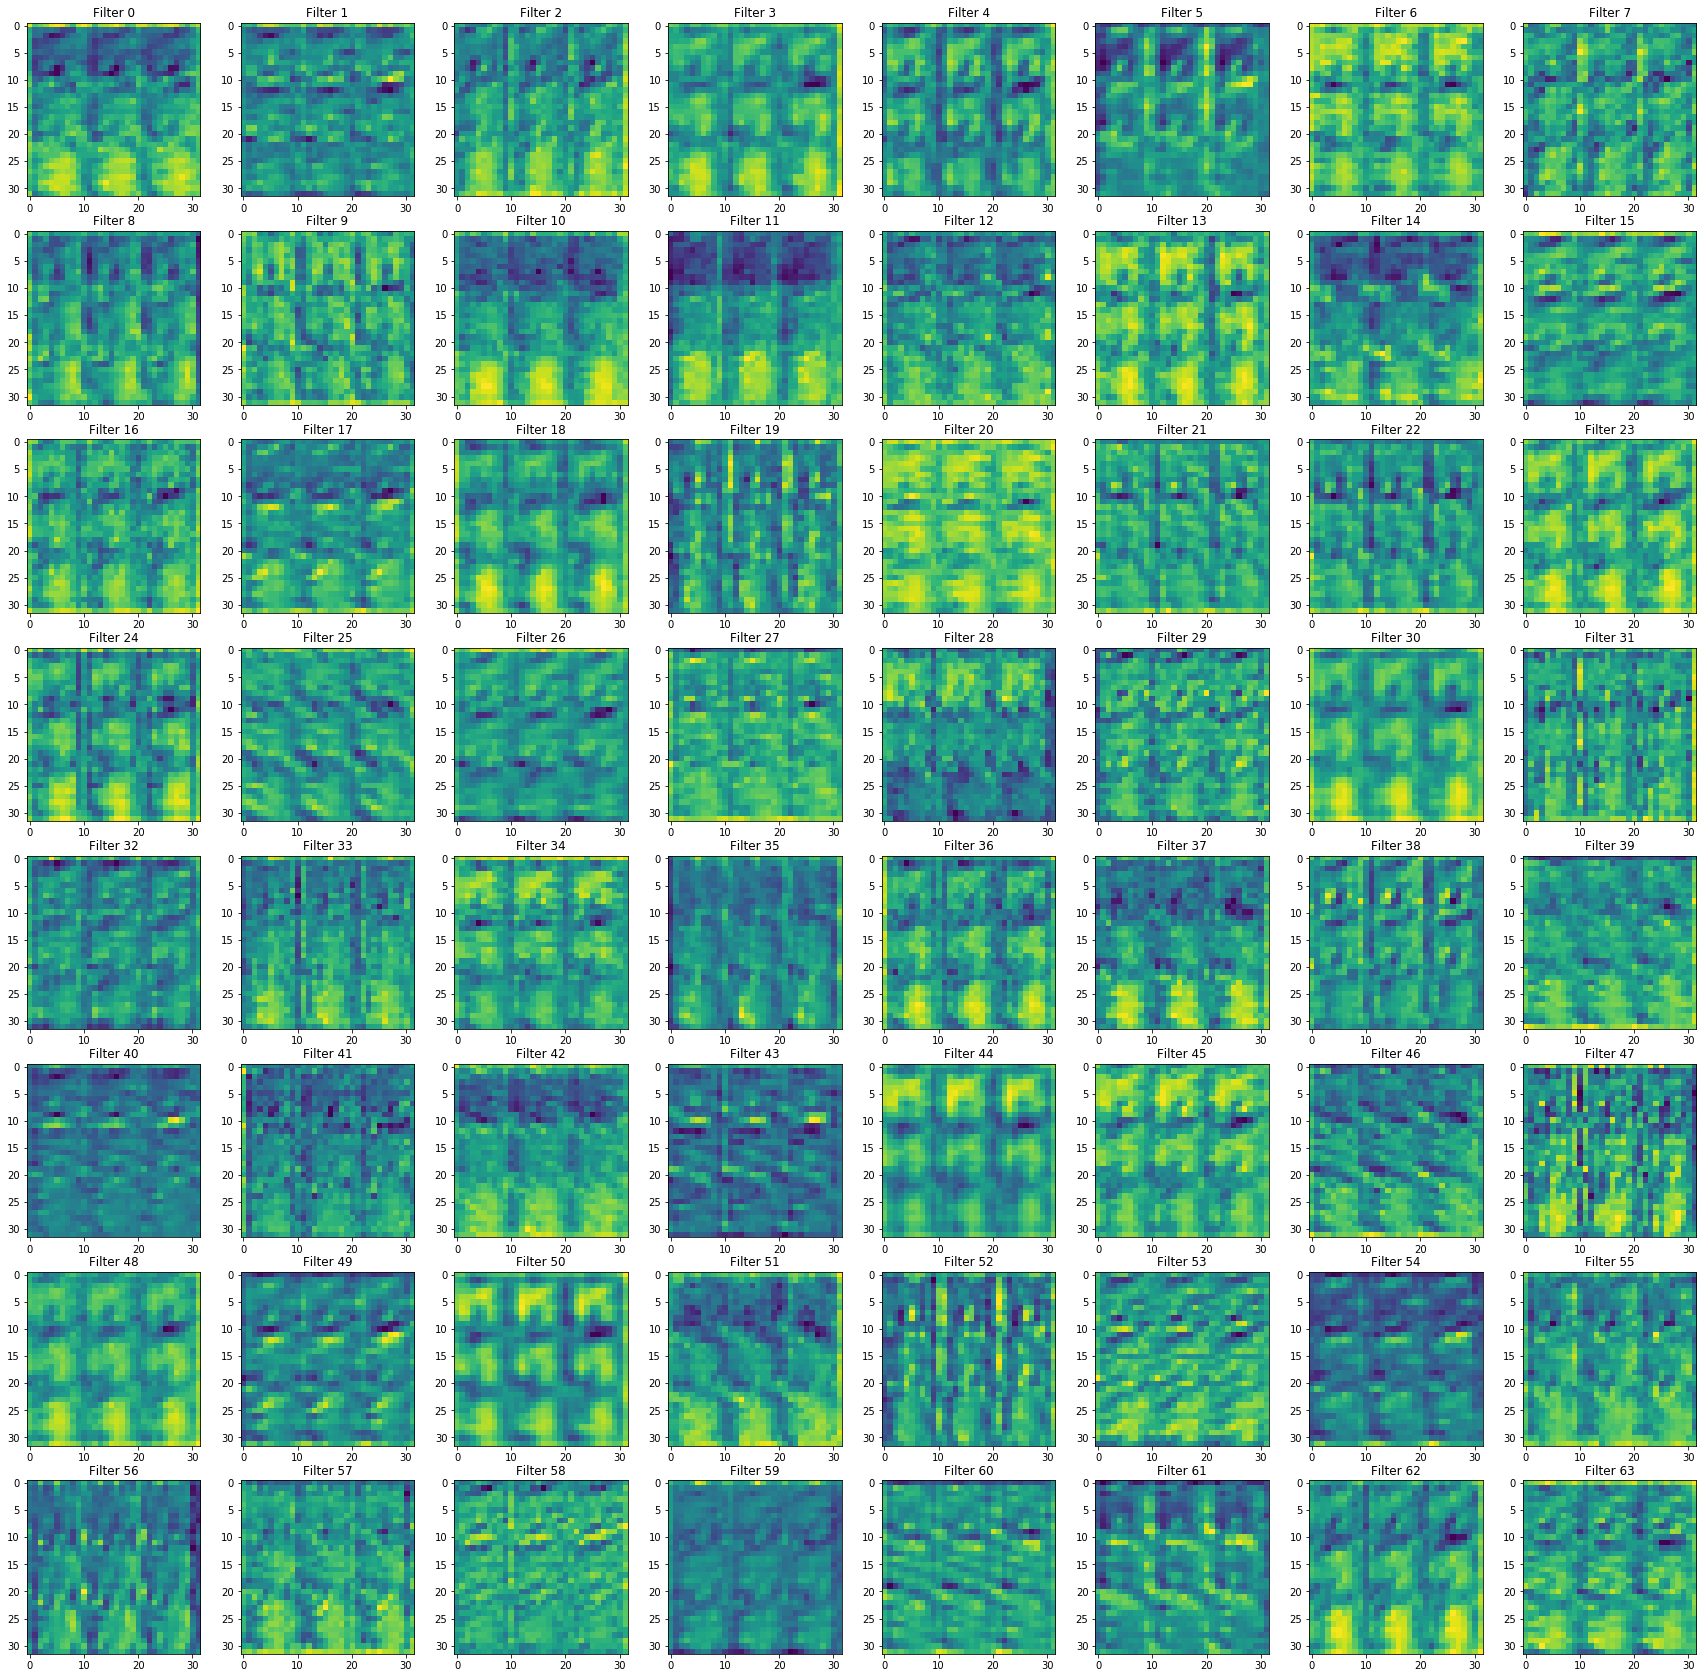

In [208]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(64):
    plt.subplot(8, 8, j)
    plt.title('Filter ' + str(i))
    plt.imshow(filters_projection_layer3[1, :, :, i], interpolation="nearest")
    j = j + 1
    
plt.show()

(3, 128, 128, 32)


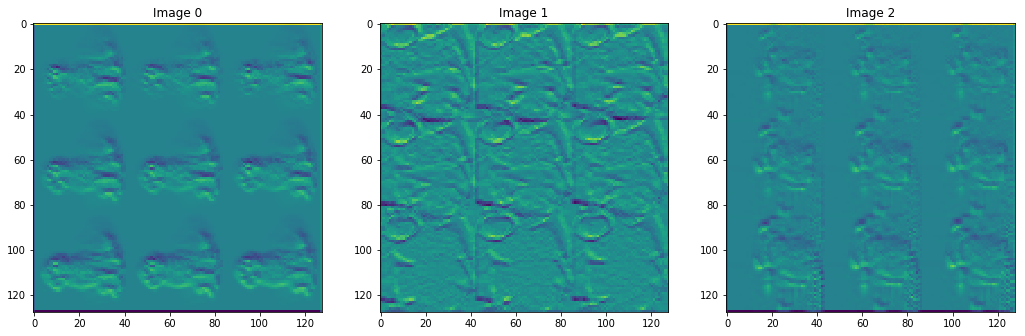

In [209]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(3):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(filters_projection_layer1[i, :, :, 5], interpolation="nearest")
    j = j + 1
    
plt.show()

(3, 128, 128, 32)


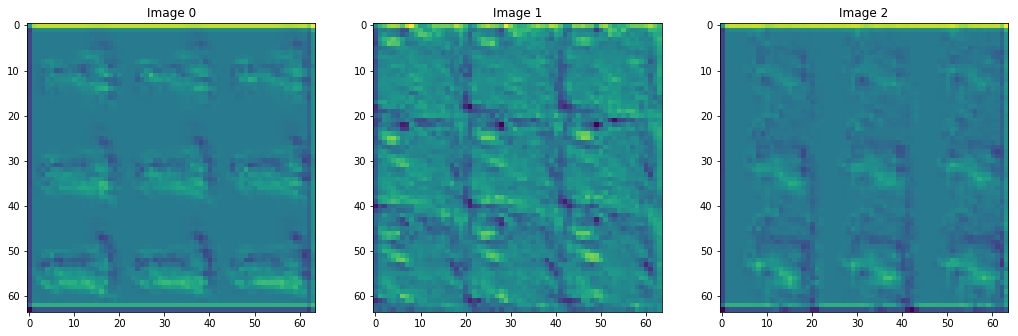

In [211]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(3):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(filters_projection_layer2[i, :, :, 10], interpolation="nearest")
    j = j + 1
    
plt.show()

(3, 128, 128, 32)


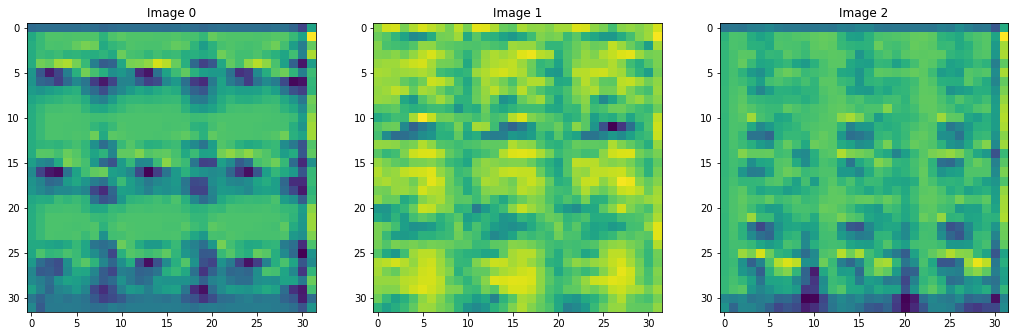

In [212]:
plt.figure(1, figsize=(30, 30))
j = 1
print(filters_projection_layer1.shape)

for i in range(3):
    plt.subplot(2, 5, j)
    plt.title('Image ' + str(i))
    plt.imshow(filters_projection_layer3[i, :, :, 20], interpolation="nearest")
    j = j + 1
    
plt.show()